In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

### Showing areal density bug

In [2]:
def plot_circle(center: Location,
                radius: float,
                axes_subplot,
                fill: bool = False,
                color: str = 'black',
                lw: float = 1,
                antialiased: bool = True,
                alpha: float = 1,
                linestyle: str = "-"):
    """
    Plots the specified circle on the supplied subplot.
    """
    axes_subplot.add_patch(matplotlib.patches.Circle(center,
                                                     radius=radius,
                                                     color=color,
                                                     fill=fill,
                                                     lw=lw,
                                                     antialiased=antialiased,
                                                     alpha=alpha,
                                                     linestyle=linestyle
                                                    ))

In [ ]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.axes.set_axis_off()

craters = [
    (radius + radius, radius, radius, "black", .5, "-", True),
    (radius, radius, radius, "black", .5, "-", True),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
ax.text(radius / 3, radius * 2, "A", fontsize=15)
ax.text(radius * 8/3, radius * 2, "B", fontsize=15)
plt.savefig("figures/before_crater_removal.png", pad_inches=0)
plt.show()

In [ ]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.axes.set_axis_off()

craters = [
    (radius, radius, radius, "black", .5, "-", True),
    (radius + radius, radius, radius, "white", 1, "-", True),
    (radius + radius, radius, radius, "black", .5, "--", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
ax.text(radius / 3, radius * 2, "A", fontsize=15)
ax.text(radius * 8/3, radius * 2, "B", fontsize=15)
plt.savefig("figures/after_crater_removal.png", pad_inches=0)
plt.show()

### Distorted Z and Z_a calculations

In [ ]:
study_region_size = 800
study_region_padding = 200
radius = 50

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

total_region_size = study_region_size + 2 * study_region_padding

ax.set_xlim([0, total_region_size])
ax.set_ylim([0, total_region_size])
ax.axes.set_axis_off()

np.random.seed(123)
craters = [
    (x[0], x[1], radius, "black", 1, "-", False)
    for x in np.random.rand(1000, 2) * total_region_size
    if not (study_region_padding < x[0] < total_region_size - study_region_padding and study_region_padding < x[1] < total_region_size - study_region_padding)
][:200]

craters += [
    (study_region_padding + radius * 3, study_region_padding + radius * 3, radius * 2, "green", .6, "-", True)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
rectangle = matplotlib.patches.Rectangle((study_region_padding, study_region_padding), study_region_size, study_region_size,
                                         color="black",
                                         fill=False,
                                         lw=4)
ax.add_patch(rectangle)
    
plt.savefig("figures/edge_effects.png", bbox_inches="tight", pad_inches=0)
plt.show()

### Approximation of rim removal in the IDL code

In [ ]:
study_region_size = 1000

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

craters = [
    (study_region_size * 3 / 2, study_region_size / 2, study_region_size * .75, "black", 1, "-", False)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
x_points = []
y_points = []
radius = 250
n_points = 32
for n in range(n_points):
    x_points.append(radius * np.cos(n / n_points * 2 * np.pi) + study_region_size * .67)
    y_points.append(radius * np.sin(n / n_points * 2 * np.pi) + study_region_size / 2)
    
colors = ["r"] * 6 + ["y"] * 21 + ["r"] * 5
    
ax.scatter(x_points, y_points, c=colors, lw=2)
    
    
plt.savefig("figures/rim_removal_approximation.png", bbox_inches="tight", pad_inches=0)
plt.show()

In [ ]:
study_region_size = 1000

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# ax.set_xlim([0, study_region_size])
# ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

craters = [
    (325, study_region_size / 2, study_region_size * .175, "black", 1, "-", False)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
x_points = []
y_points = []
radius = 250
n_points = 32
for n in range(n_points):
    x_points.append(radius * np.cos(n / n_points * 2 * np.pi) + study_region_size * .67)
    y_points.append(radius * np.sin(n / n_points * 2 * np.pi) + study_region_size / 2)
    
colors = ["r"] * 14 + ["y"] * 5 + ["r"] * 13
    
ax.scatter(x_points, y_points, c=colors, lw=2)
        
plt.savefig("figures/rim_removal_approximation.png", bbox_inches="tight", pad_inches=0)
plt.show()

### Crater illustration

In [3]:
study_region_size = 800
radius = 30

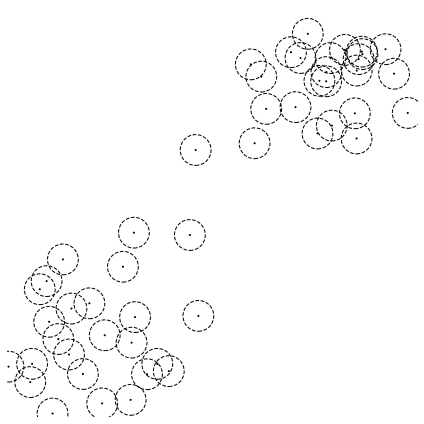

In [53]:
# Clustered
np.random.seed(123)

# Centered lower left
craters = [
    (x[0], x[1], radius, "black", 1, "--", False)
    for x in np.random.randn(1000, 2) * study_region_size / 9.0 + study_region_size / 5
    if 0 < x[0] < study_region_size and 0 < x[1] < study_region_size
][:25]

craters += [
    (x[0], x[1], radius, "black", 1, "--", False)
    for x in np.random.randn(1000, 2) * study_region_size / 9.0 + study_region_size * 4 / 5
    if 0 < x[0] < study_region_size and 0 < x[1] < study_region_size
][:25]

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/clustered_example.png")
plt.show()

In [54]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
(nn_obs - nn_exp) / sigma

-3.0897582119138773

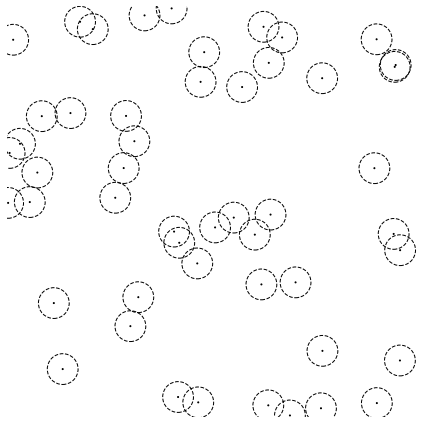

0.19605577171977795

In [51]:
# Random
np.random.seed(12)

# Centered lower left
craters = [
    (x[0], x[1], radius, "black", 1, "--", False)
    for x in np.random.rand(1000, 2) * study_region_size
][:50]

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/random_example.png")
plt.show()

In [52]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
(nn_obs - nn_exp) / sigma

0.19605577171977795

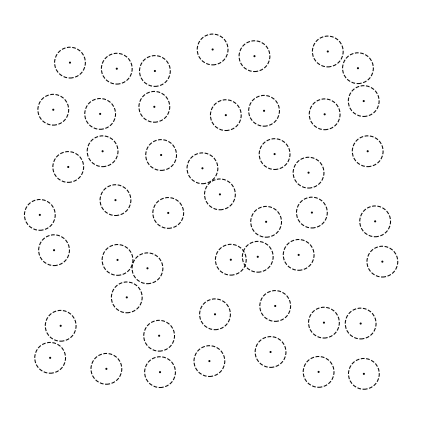

In [12]:
# Uniform
np.random.seed(123)

# Centered lower left
craters = [
    ((x + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, (y + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, radius, "black", 1, "--", False)
    for x in range(7)
    for y in range(7)
][:50]

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/uniform_example.png")
plt.show()

In [13]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
(nn_obs - nn_exp) / sigma

4.616472328123532

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters[:25]:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters[:50]:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.show()

### Demonstrating cookie-cutting and effective radius multiplier

In [ ]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.axes.set_axis_off()

craters = [
    (radius, radius, radius, "black", 1, "-", False),
    (radius + radius, radius, radius*.75, "white", 1, "-", True),
    (radius + radius, radius, radius*.75, "blue", 1, "dotted", False),
    (radius + radius, radius, radius*.5, "black", 1, "-", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
arc = matplotlib.patches.Arc((radius, radius), radius*2, radius*2, theta1=-43, theta2=43, linestyle="dashed")
ax.add_patch(arc)
    
ax.text(radius-10, radius-10, "A", fontsize=16)
ax.text(radius + radius + 25, radius - 10, "B", fontsize=16)
plt.savefig("figures/cookie_cutting_with_effective_radius.png", pad_inches=0)
plt.show()

### Demonstrating crater erasure effectiveness ratio

In [ ]:
radius = 600

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_tight_layout(True)

ax.set_xlim([-radius*1.6, radius*1.5 + 20])
ax.set_ylim([-radius - 10, radius + 10])
ax.axes.set_axis_off()

craters = [
    (0, 0, radius, "black", 1, "-", False),
    (radius, 0, 60, "red", 1, "--", False),
    (radius, 80, 60, "red", 1, "--", False),
    (radius, -80, 60, "red", 1, "--", False),
    (-radius - radius/10, 0, radius / 2, "white", 1, "-", True),
    (-radius - radius/10, 0, radius / 2, "blue", 1, "dotted", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
arc = matplotlib.patches.Arc((0, 0), radius*2, radius*2, theta1=148, theta2=212, linestyle="dashed")
ax.add_patch(arc)
    
ax.text(-10, -10, "A", fontsize=16)
ax.text(-radius - 85, -10, "B", fontsize=16)
ax.text(radius + 75, -10, "C", fontsize=16)
plt.savefig("figures/crater_erasure_effectiveness_ratio.png", pad_inches=0)
plt.show()